<a href="https://colab.research.google.com/github/Laimo64/SAM-Liver/blob/main/nnUNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customized Segment Anything Model for Medical Image Segmentation
### [[Paper](https://arxiv.org/pdf/2304.13785.pdf)] [[Github](https://github.com/hitachinsk/SAMed)]
---


# Setup environment

In [1]:
!pip install -q gdown==4.6.0 einops==0.6.1 icecream==2.1.3 MedPy==0.4.0 monai==1.1.0 opencv_python==4.5.4.58 SimpleITK==2.2.1 tensorboardX==2.6 ml-collections==0.1.1 onnx==1.13.1 onnxruntime==1.14.1 tensorboardX torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.8/89.8 MB 10.6 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [2]:
pip install medpy icecream monai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.3/156.3 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━

# Download codes, pretrained weights and test data

In [3]:
# prepare codes
import os
CODE_DIR = 'samed_codes'
os.makedirs(f'./{CODE_DIR}')
!git clone https://github.com/hitachinsk/SAMed.git $CODE_DIR
os.chdir(f'./{CODE_DIR}')

Cloning into 'samed_codes'...
remote: Enumerating objects: 225, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 225 (delta 42), reused 29 (delta 29), pack-reused 167 (from 1)
Receiving objects: 100% (225/225), 636.92 KiB | 19.90 MiB/s, done.
Resolving deltas: 100% (103/103), done.


In [4]:
# this is the small dataset based on L3D_Dataset, change to L3D_Dataset when the code is ready
!gdown --fuzzy https://drive.google.com/file/d/18KVLU4y0BPoRqtHnhsE3KbTQb2BEUXTz/view?usp=sharing
# !gdown --fuzzy https://drive.google.com/file/d/1JyTYDCkv3RGUnkE--l-Kf9v5PLOCI3k1/view?usp=drive_link  #L3D_dataset
!ls

Downloading...
From (original): https://drive.google.com/uc?id=18KVLU4y0BPoRqtHnhsE3KbTQb2BEUXTz
From (redirected): https://drive.google.com/uc?id=18KVLU4y0BPoRqtHnhsE3KbTQb2BEUXTz&confirm=t&uuid=4e9cb3bc-a4f8-455c-91d5-7391823a5bc0
To: /content/samed_codes/test_dataset.zip
100% 139M/139M [00:04<00:00, 28.0MB/s]
datasets   preprocess	     sam_lora_image_encoder_mask_decoder.py  test_dataset.zip  utils.py
LICENSE    README.md	     sam_lora_image_encoder.py		     test.py
lists	   requirements.txt  segment_anything			     trainer.py
materials  SAMed_h	     subsample_datasets.py		     train.py


In [5]:
%cd /content/samed_codes
#dataset
import zipfile
with zipfile.ZipFile('test_dataset.zip', 'r') as zip_ref:
    zip_ref.extractall()
#weights
!gdown https://drive.google.com/uc?id=1P0Bm-05l-rfeghbrT1B62v5eN-3A-uOr #'epoch_159.pth'
!gdown https://drive.google.com/uc?id=1_oCdoEEu3mNhRfFxeWyRerOKt8OEUvcg #'sam_vit_b_01ec64.pth'

/content
Downloading...
From: https://drive.google.com/uc?id=1P0Bm-05l-rfeghbrT1B62v5eN-3A-uOr
To: /content/samed_codes/epoch_159.pth
100% 19.7M/19.7M [00:00<00:00, 102MB/s] 
Downloading...
From (original): https://drive.google.com/uc?id=1_oCdoEEu3mNhRfFxeWyRerOKt8OEUvcg
From (redirected): https://drive.google.com/uc?id=1_oCdoEEu3mNhRfFxeWyRerOKt8OEUvcg&confirm=t&uuid=6cf24c09-f68e-40cf-a5bf-c650c2b26946
To: /content/samed_codes/sam_vit_b_01ec64.pth
100% 375M/375M [00:08<00:00, 43.4MB/s]


Dataloader:

/content/samed_codes


[0 1 2 3]


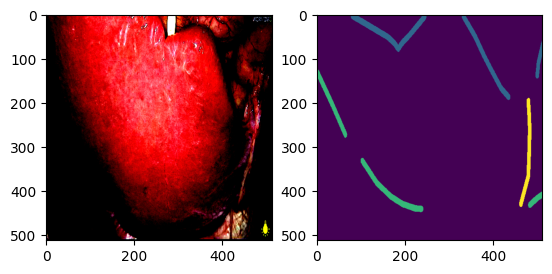

In [1]:
%cd /content/samed_codes
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
from torchvision.transforms import InterpolationMode
from glob import glob
import imageio.v2 as iio
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from scipy.ndimage import zoom
from einops import repeat
from scipy import ndimage
import random
from PIL import Image
import cv2

def normalise_intensity(image, ROI_thres=0.1):
    pixel_thres = np.percentile(image, ROI_thres)
    ROI = np.where(image > pixel_thres, image, 0) # If image value is greater than pixel threshold, return image value, otherwise return 0
    mean = np.mean(ROI)
    std = np.std(ROI)
    ROI_norm = (ROI - mean) / (std + 1e-8) # Normalise ROI
    return ROI_norm

def random_rot_flip(image, label):
    k = np.random.randint(0, 4)
    image = np.rot90(image, k)
    label = np.rot90(label, k)
    axis = np.random.randint(0, 2)
    image = np.flip(image, axis=axis).copy()
    label = np.flip(label, axis=axis).copy()
    return image, label


def random_rotate(image, label):
    angle = np.random.randint(-20, 20)
    image = ndimage.rotate(image, angle, order=0, reshape=False)
    label = ndimage.rotate(label, angle, order=0, reshape=False)
    return image, label

def map_labels(label):
    label_map = {0: 0, 85: 1, 128:0, 170: 2, 255: 3}
    mapped_label = label.copy()
    for k, v in label_map.items():
        mapped_label[label == k] = v
    return mapped_label

class SegmentationDataset(Dataset):

  #######################################
    def __init__(self, root='/content/samed_codes/test_dataset/Train', low_res=None, transform_img=None, transform_mask=None, istrain=False):
        self.img_path_all = glob(root + '/images/*.jpg')  # Update the path and pattern
        self.mask_path_all = glob(root + '/masks_gt/*.png')  # Update the path and pattern
        self.transform_img = transform_img
        self.transform_mask = transform_mask
        self.istrain = istrain
        self.low_res = low_res

        self.brightness = 0.1
        self.contrast = 0.1
        self.saturation = 0.1
        self.hue = 0.1
        self.color_aug = transforms.ColorJitter(self.brightness, self.contrast, self.saturation, self.hue)

    def __len__(self):
        return len(self.img_path_all)

    def __getitem__(self, idx):
        img_path = self.img_path_all[idx]
        mask_path = self.mask_path_all[idx]
        # print(f"Found {len(self.img_path_all)} images and {len(self.mask_path_all)} masks")

        # Open image and mask
        image = Image.open(img_path).convert('RGB')
        mask = Image.open(mask_path).convert('L') #29(3), 76(1), 150 (2)
        mask = np.array(mask)
        # class mapping
        mask[mask==0] = 0   #background
        mask[mask==76] = 1  #red
        mask[mask==150] = 2 #green
        mask[mask==29] = 3 #blue
        mask = Image.fromarray(mask)
        # Apply transformations if provided
        if self.istrain:
            hflip = random.random() < 0.5
            flip_container = random.choice([Image.FLIP_LEFT_RIGHT, Image.FLIP_TOP_BOTTOM])
            if hflip:
                image = self.color_aug(image)
                image = image.transpose(flip_container)
                mask = mask.transpose(flip_container)
        if self.transform_img:
            image = self.transform_img(image)
        if self.transform_mask:
            mask = self.transform_mask(mask)  # Convert first channel of mask to Image format
        # image = transforms.ToTensor()(image)  # **Converting image to tensor**
        mask = torch.from_numpy(np.array(mask)).long()
        sample = {'image': image, 'mask': mask}

        if self.low_res:
            low_res_label = zoom(mask, (self.low_res/mask.shape[0], self.low_res/mask.shape[1]), order=0)
            sample = {'image': image, 'mask': mask, 'low_res_label': low_res_label}

        return sample

transform_img = transforms.Compose([
    transforms.Resize((512, 512)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
        )
    ])

transform_mask = transforms.Compose([
    transforms.Resize((512, 512), interpolation=InterpolationMode.NEAREST),
    # transforms.ToTensor(),
    ])
ds = SegmentationDataset(transform_img=transform_img, transform_mask=transform_mask, istrain=True)
for sample in ds:
    print(np.unique(sample['mask']))  # Check unique values in the mask (class IDs)
    plt.subplot(121); plt.imshow(sample['image'].permute(1, 2, 0))  # Rearrange image channels for display
    plt.subplot(122); plt.imshow(sample['mask'])  # Display the mask
    plt.show()  # 顯示圖像
    break

nnUNet Training

In [3]:
%cd /content/samed_codes
import os
import sys
from tqdm import tqdm
import logging
import numpy as np
import argparse
import random
import numpy as np
import torch
from torch.utils.data import DataLoader
import torch.backends.cudnn as cudnn
from importlib import import_module
from segment_anything import sam_model_registry
from datasets.dataset_synapse import Synapse_dataset
from icecream import ic
from medpy import metric
from scipy.ndimage import zoom
import torch.nn as nn
import SimpleITK as sitk
import torch.nn.functional as F
import imageio
from einops import repeat

from torch.nn.modules.loss import CrossEntropyLoss
from utils import DiceLoss
import torch.optim as optim
import monai


def seed_everything(seed=42):
    cudnn.benchmark = False
    cudnn.deterministic = True
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)

def calc_loss(outputs, label_batch, ce_loss, dice_loss, dice_weight:float=0.8):
    loss_ce = ce_loss(outputs, label_batch[:].long())
    loss_dice = dice_loss(outputs, label_batch, softmax=True)
    loss = (1 - dice_weight) * loss_ce + dice_weight * loss_dice
    return loss, loss_ce, loss_dice

def training_per_epoch(model, trainloader, optimizer, iter_num, ce_loss, dice_loss, multimask_output=True, args=None):
    model.train()
    loss_all = []
    for i_batch, sampled_batch in enumerate(trainloader):
        image_batch, label_batch, low_res_label_batch = sampled_batch['image'],sampled_batch['mask'], sampled_batch['low_res_label']
        image_batch, label_batch, low_res_label_batch = image_batch.to(device, dtype=torch.float32), label_batch.to(device, dtype=torch.long), low_res_label_batch.to(device, dtype=torch.long)
        outputs = model(image_batch)
        # print('out:',outputs.shape)
        loss, loss_ce, loss_dice = calc_loss(outputs, label_batch, ce_loss, dice_loss)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_all.append(loss.item())
        if args.warmup and iter_num < args.warmup_period:
            lr_ = args.base_lr * ((iter_num + 1) / args.warmup_period)
            for param_group in optimizer.param_groups:
                param_group['lr'] = lr_
        else:
            if args.warmup:
                shift_iter = iter_num - args.warmup_period
                assert shift_iter >= 0, f'Shift iter is {shift_iter}, smaller than zero'
            else:
                shift_iter = iter_num
            lr_ = args.base_lr * (1.0 - shift_iter / args.max_iterations) ** 0.9  # learning rate adjustment depends on the max iterations
            for param_group in optimizer.param_groups:
                param_group['lr'] = lr_

        iter_num = iter_num + 1

    return np.mean(loss_all)


def test_per_epoch(model, testloader, ce_loss, dice_loss, multimask_output=True, args=None):
    model.eval()
    loss_per_epoch, dice_per_epoch = [], []
    with torch.no_grad():
        for i_batch, sampled_batch in enumerate(testloader):
            image_batch, label_batch, low_res_label_batch = sampled_batch['image'],sampled_batch['mask'], sampled_batch['low_res_label']
            image_batch, label_batch, low_res_label_batch = image_batch.to(device, dtype=torch.float32), label_batch.to(device, dtype=torch.long), low_res_label_batch.to(device, dtype=torch.long)
            outputs = model(image_batch)
            loss, loss_ce, loss_dice = calc_loss(outputs, label_batch, ce_loss, dice_loss)
            loss_per_epoch.append(loss.item())
            dice_per_epoch.append(1-loss_dice.item())
    return np.mean(loss_per_epoch), np.mean(dice_per_epoch)



def main():
    parser = argparse.ArgumentParser()
    parser.add_argument('--config', type=str, default=None, help='The config file provided by the trained model')
    #####################################
    parser.add_argument('--volume_path', type=str, default='/content/samed_codes/test_dataset')
    parser.add_argument('--data_path', type=str, default='test_dataset')
    #####################################
    parser.add_argument('--dataset', type=str, default='Synapse', help='Experiment name')
    parser.add_argument('--num_classes', type=int, default=2)
    parser.add_argument('--list_dir', type=str, default='./lists/lists_Synapse/', help='list_dir')
    parser.add_argument('--output_dir', type=str, default='results')
    parser.add_argument('--img_size', type=int, default=512, help='Input image size of the network')
    parser.add_argument('--input_size', type=int, default=224, help='The input size for training SAM model')
    parser.add_argument('--seed', type=int,
                        default=1234, help='random seed')
    parser.add_argument('--is_savenii', action='store_true', help='Whether to save results during inference')
    parser.add_argument('--deterministic', type=int, default=1, help='whether use deterministic training')
    parser.add_argument('--ckpt', type=str, default='checkpoints/sam_vit_b_01ec64.pth',
                        help='Pretrained checkpoint')
    parser.add_argument('--lora_ckpt', type=str, default='checkpoints/epoch_159.pth', help='The checkpoint from LoRA')
    parser.add_argument('--vit_name', type=str, default='vit_b', help='Select one vit model')
    parser.add_argument('--rank', type=int, default=6, help='Rank for LoRA adaptation')
    parser.add_argument('--module', type=str, default='sam_lora_image_encoder')

    parser.add_argument('--base_lr', type=float, default=0.005, help='segmentation network learning rate')
    parser.add_argument('--batch_size', type=int, default=4, help='batch_size per gpu')
    parser.add_argument('--warmup', type=bool, default=True, help='If activated, warp up the learning from a lower lr to the base_lr')
    parser.add_argument('--warmup_period', type=int, default=250, help='Warp up iterations, only valid whrn warmup is activated')
    parser.add_argument('--AdamW', type=bool, default=True, help='If activated, use AdamW to finetune SAM model')
    parser.add_argument('--max_epochs', type=int, default=10, help='maximum epoch number to train')
    parser.add_argument('--max_iterations', type=int, default=30000, help='maximum epoch number to train')


    if 'ipykernel' in sys.modules:
        args = parser.parse_args([])
    else:
        args = parser.parse_args()

    args.output_dir = 'results'
    os.makedirs(args.output_dir, exist_ok = True)


    kernels = [[3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3]]
    strides = [[1, 1], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]

    net = monai.networks.nets.DynUNet(
            spatial_dims=2,
            in_channels=3,
            out_channels=args.num_classes + 1,
            strides=strides,
            kernel_size=kernels,
            upsample_kernel_size=strides[1:],

    ).to(device)
    multimask_output = True if args.num_classes > 1 else False

    train_dataset = SegmentationDataset(root=(args.data_path+'/Train'), low_res=128, transform_img=transform_img, transform_mask=transform_mask, istrain=True)
    test_dataset = SegmentationDataset(root=(args.data_path+'/Test'), low_res=128, transform_img=transform_img, transform_mask=transform_mask)
    trainloader = DataLoader(train_dataset, batch_size=args.batch_size, shuffle=True, num_workers=2)
    testloader = DataLoader(test_dataset, batch_size=args.batch_size, shuffle=False, num_workers=2)
    print('Training on:', device, 'train sample size:', len(train_dataset), 'test sample size:', len(test_dataset), 'batch:', args.batch_size)

    ce_loss = CrossEntropyLoss()
    dice_loss = DiceLoss(args.num_classes + 1)
    b_lr = args.base_lr / args.warmup_period
    optimizer = optim.AdamW(filter(lambda p: p.requires_grad, net.parameters()), lr=b_lr, betas=(0.9, 0.999), weight_decay=0.1)
    iter_num = 0

    best_epoch, best_loss = 0.0, np.inf
    for epoch in range(args.max_epochs):
        loss_training = training_per_epoch(net, trainloader, optimizer, iter_num, ce_loss, dice_loss, multimask_output=multimask_output, args=args)
        loss_testing, dice = test_per_epoch(net, testloader, ce_loss, dice_loss,multimask_output=True, args=args)

        if loss_testing < best_loss:
            best_loss = loss_testing
            best_epoch = epoch
            torch.save(net.state_dict(), os.path.join(args.output_dir, 'model_best.pt'))
            # net.save_lora_parameters(os.path.join(args.output_dir, 'model_best.pt'))

        print('--- Epoch {}\{}: Training loss = {:.4f}, Testing: [loss = {:.4f}, dice = {:.4f}], Best loss = {:.4f}, Best epoch = {}, lr = {:.6f}'.\
            format(epoch, args.max_epochs, loss_training, loss_testing, dice, best_loss, best_epoch, optimizer.param_groups[0]['lr']))


if __name__ == '__main__':
    seed_everything()
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    main()



/content/samed_codes


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [17]:
pip install monai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 864.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalli

Inference: My Dice Metrics

Class Wise Dice: {'dice_cls:1': 0.8948499946994594, 'dice_cls:2': 0.5964358369273334}
Overall Dice: 0.7456429158133964


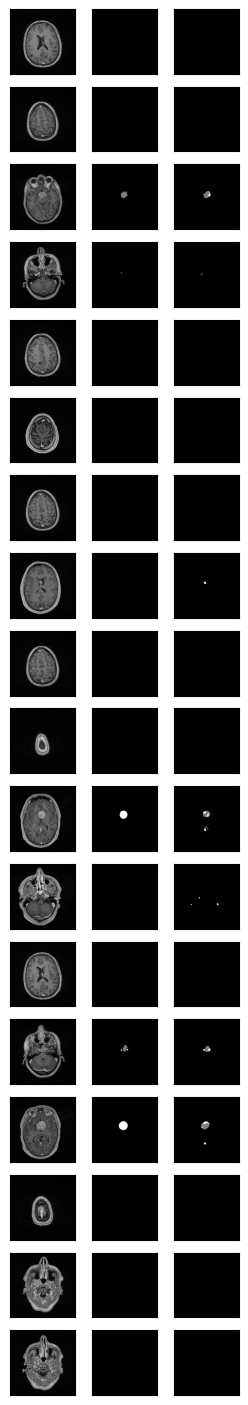

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def calculate_confusion_matrix_from_arrays(prediction, ground_truth, nr_labels):
    replace_indices = np.vstack((
        ground_truth.flatten(),
        prediction.flatten())
    ).T
    confusion_matrix, _ = np.histogramdd(
        replace_indices,
        bins=(nr_labels, nr_labels),
        range=[(0, nr_labels), (0, nr_labels)]
    )
    confusion_matrix = confusion_matrix.astype(np.uint32)
    return confusion_matrix

def calculate_dice(confusion_matrix):
    dices = []
    for index in range(confusion_matrix.shape[0]):
        true_positives = confusion_matrix[index, index]
        false_positives = confusion_matrix[:, index].sum() - true_positives
        false_negatives = confusion_matrix[index, :].sum() - true_positives
        denom = 2 * true_positives + false_positives + false_negatives
        if denom == 0:
            dice = 0
        else:
            dice = 2 * float(true_positives) / denom
        dices.append(dice)
    return dices

def test_per_epoch(model, testloader, ce_loss, dice_loss, multimask_output=True, args=None):
    model.eval()
    fig, axs = plt.subplots(len(testloader), 3, figsize=(1*3, len(testloader)*1), subplot_kw=dict(xticks=[],yticks=[]))
    loss_per_epoch, dice_per_epoch = [], []
    num_classes = args.num_classes + 1
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=np.uint32)
    class_wise_dice = []
    with torch.no_grad():
        for i_batch, sampled_batch in enumerate(testloader):
            image_batch, label_batch, low_res_label_batch = sampled_batch['image'],sampled_batch['mask'], sampled_batch['low_res_label']
            image_batch, label_batch, low_res_label_batch = image_batch.to(device, dtype=torch.float32), label_batch.to(device, dtype=torch.long), low_res_label_batch.to(device, dtype=torch.long)
            logits = model(image_batch)
            prob = F.softmax(logits, dim=1)
            pred_seg = torch.argmax(prob, dim=1)
            confusion_matrix += calculate_confusion_matrix_from_arrays(pred_seg.cpu(), label_batch.cpu(), num_classes)
            loss, loss_ce, loss_dice = calc_loss(logits, label_batch, ce_loss, dice_loss)
            loss_per_epoch.append(loss.item())
            dice_per_epoch.append(1-loss_dice.item())
            loss_dice = dice_loss(logits, label_batch, softmax=True)
            img_num = 0
            axs[i_batch, 0].imshow(image_batch[img_num, 0].cpu().numpy(), cmap='gray')
            axs[i_batch, 1].imshow(label_batch[img_num].cpu().numpy(), cmap='gray')
            axs[i_batch, 2].imshow(pred_seg[img_num].cpu().numpy(), cmap='gray')
            metric_list = []
            pred_seg, label_batch = pred_seg.cpu().detach().numpy(), label_batch.cpu().detach().numpy()

        confusion_matrix = confusion_matrix[1:, 1:]  # exclude background
        dices_per_class = {'dice_cls:{}'.format(cls + 1): dice
                    for cls, dice in enumerate(calculate_dice(confusion_matrix))}

    return np.mean(loss_per_epoch), np.mean(dice_per_epoch), dices_per_class



if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--config', type=str, default=None, help='The config file provided by the trained model')
    parser.add_argument('--volume_path', type=str, default='testset/test_vol_h5/')
    parser.add_argument('--dataset', type=str, default='Synapse', help='Experiment name')
    parser.add_argument('--num_classes', type=int, default=2)
    parser.add_argument('--list_dir', type=str, default='./lists/lists_Synapse/', help='list_dir')
    parser.add_argument('--output_dir', type=str, default='results')
    parser.add_argument('--img_size', type=int, default=512, help='Input image size of the network')
    parser.add_argument('--input_size', type=int, default=224, help='The input size for training SAM model')
    parser.add_argument('--seed', type=int,
                        default=1234, help='random seed')
    parser.add_argument('--is_savenii', action='store_true', help='Whether to save results during inference')
    parser.add_argument('--deterministic', type=int, default=1, help='whether use deterministic training')
    parser.add_argument('--ckpt', type=str, default='checkpoints/sam_vit_b_01ec64.pth',
                        help='Pretrained checkpoint')
    parser.add_argument('--lora_ckpt', type=str, default='checkpoints/epoch_159.pth', help='The checkpoint from LoRA')
    parser.add_argument('--vit_name', type=str, default='vit_b', help='Select one vit model')
    parser.add_argument('--rank', type=int, default=4, help='Rank for LoRA adaptation')
    parser.add_argument('--module', type=str, default='sam_lora_image_encoder')

    parser.add_argument('--base_lr', type=float, default=0.005, help='segmentation network learning rate')
    parser.add_argument('--batch_size', type=int, default=12, help='batch_size per gpu')
    parser.add_argument('--warmup', type=bool, default=True, help='If activated, warp up the learning from a lower lr to the base_lr')
    parser.add_argument('--warmup_period', type=int, default=250, help='Warp up iterations, only valid whrn warmup is activated')
    parser.add_argument('--AdamW', type=bool, default=True, help='If activated, use AdamW to finetune SAM model')
    parser.add_argument('--max_epochs', type=int, default=10, help='maximum epoch number to train')
    parser.add_argument('--max_iterations', type=int, default=30000, help='maximum epoch number to train')


    if 'ipykernel' in sys.modules:
        args = parser.parse_args([])
    else:
        args = parser.parse_args()

    args.ckpt = 'results/model_best.pt'
    kernels = [[3, 3], [3, 3], [3, 3], [3, 3], [3, 3], [3, 3]]
    strides = [[1, 1], [2, 2], [2, 2], [2, 2], [2, 2], [2, 2]]

    net = monai.networks.nets.DynUNet(
            spatial_dims=2,
            in_channels=3,
            out_channels=args.num_classes + 1,
            strides=strides,
            kernel_size=kernels,
            upsample_kernel_size=strides[1:],

    ).to(device)

    ce_loss = CrossEntropyLoss()
    dice_loss = DiceLoss(args.num_classes + 1)

    net.load_state_dict(torch.load(args.ckpt))
    testloader = DataLoader(test_dataset, batch_size=20, shuffle=False, num_workers=2)
    test_loss, overall_dice, dices_per_class = test_per_epoch(net, testloader, ce_loss, dice_loss, multimask_output=True, args=args)
    dices_per_class_list = np.array(list(dices_per_class.values()))
    print('Class Wise Dice:', dices_per_class)
    print('Overall Dice:', np.mean(dices_per_class_list))

Inference MRI to MRI<br>
download test mri

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1zcvnBscFVI2v5ieAlGGnp0zpX8WmIrD4'
gdown.download(url,'endonasal_mri_patients.zip',quiet=True)
!unzip -q endonasal_mri_patients
!rm -rf /content/endonasal_mri_patients/.DS_Store
!rm -rf /content/endonasal_mri_patients/**/.DS_Store

MRI to MRI

In [7]:
import os
import nibabel as nib
import cv2
import numpy as np
from scipy.ndimage import zoom
from einops import repeat
import random
import matplotlib.pyplot as plt
import numpy as np

def read_mri(mri_path):
    img_meta = nib.load(mri_path)
    array = img_meta.get_fdata()
    return np.rot90(array)

def normalise_intensity(image, ROI_thres=0.1):
    pixel_thres = np.percentile(image, ROI_thres)
    ROI = np.where(image > pixel_thres, image, 0) # If image value is greater than pixel threshold, return image value, otherwise return 0
    mean = np.mean(ROI)
    std = np.std(ROI)
    ROI_norm = (ROI - mean) / (std + 1e-8) # Normalise ROI
    return ROI_norm

class EndonasalDataset_MRI(Dataset):
    def __init__(self, root='endonasal_mri_patients', patient=None, low_res=None, isTrain=False):

        mri_path = 'endonasal_mri_patients/mri0{}/mri0{}_t1c.nii.gz'.format(patient, patient)
        self.mask_path = 'endonasal_mri_patients/mri0{}/mri0{}_mask.nii.gz'.format(patient, patient)
        mri_array = read_mri(mri_path)
        self.image_all = []
        for z in range(mri_array.shape[2]):
            normalized_slice = cv2.normalize(mri_array[:, :, z], None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)
            self.image_all.append(normalise_intensity(normalized_slice))

        self.mask_all = read_mri(self.mask_path)
        self.isTrain = isTrain
        self.low_res = low_res

    def __len__(self):
      return len(self.image_all)

    def __getitem__(self, index):
        image = self.image_all[index]
        image = zoom(image, (512/image.shape[0], 512/image.shape[1]), order=0)
        label = self.mask_all[:,:,index]
        label = zoom(label, (512/label.shape[0], 512/label.shape[1]), order=0)
        if self.isTrain:
            if random.random() > 0.5:
                image, label = random_rot_flip(image, label)
            elif random.random() > 0.5:
                image, label = random_rotate(image, label)

        image = repeat(np.expand_dims(image, axis=0), 'c h w -> (repeat c) h w', repeat=3)
        sample = {'image': image, 'mask': label}
        if self.low_res:
            low_res_label = zoom(label, (self.low_res/label.shape[0], self.low_res/label.shape[1]), order=0)
            sample = {'image': image, 'mask': label, 'low_res_label': low_res_label, 'maskpath': self.mask_path}

        return sample


def calculate_confusion_matrix_from_arrays(prediction, ground_truth, nr_labels):
    replace_indices = np.vstack((
        ground_truth.flatten(),
        prediction.flatten())
    ).T
    confusion_matrix, _ = np.histogramdd(
        replace_indices,
        bins=(nr_labels, nr_labels),
        range=[(0, nr_labels), (0, nr_labels)]
    )
    confusion_matrix = confusion_matrix.astype(np.uint32)
    return confusion_matrix

def calculate_dice(confusion_matrix):
    dices = []
    for index in range(confusion_matrix.shape[0]):
        true_positives = confusion_matrix[index, index]
        false_positives = confusion_matrix[:, index].sum() - true_positives
        false_negatives = confusion_matrix[index, :].sum() - true_positives
        denom = 2 * true_positives + false_positives + false_negatives
        if denom == 0:
            dice = 0
        else:
            dice = 2 * float(true_positives) / denom
        dices.append(dice)
    return dices

def pred_to_mri(pred_seg_all, mask_path):
    os.makedirs('predicted_mri', mode = 0o777, exist_ok = True)
    img_meta = nib.load(mask_path)
    pred_seg_all = np.rot90(np.array(pred_seg_all).transpose(1,2,0), k=-1)
    img_nifti = nib.Nifti1Image(pred_seg_all, img_meta.affine, header=img_meta.header)
    nib.save(img_nifti,'predicted_mri/'+os.path.basename(mask_path))

def test_per_epoch(model, testloader, ce_loss, dice_loss, multimask_output=True, args=None):
    model.eval()
    loss_per_epoch, dice_per_epoch = [], []
    num_classes = args.num_classes + 1
    confusion_matrix = np.zeros((num_classes, num_classes), dtype=np.uint32)
    class_wise_dice = []
    pred_seg_all = []
    with torch.no_grad():
        for i_batch, sampled_batch in enumerate(testloader):
            image_batch, label_batch, low_res_label_batch = sampled_batch['image'],sampled_batch['mask'], sampled_batch['low_res_label']
            image_batch, label_batch, low_res_label_batch = image_batch.to(device, dtype=torch.float32), label_batch.to(device, dtype=torch.long), low_res_label_batch.to(device, dtype=torch.long)
            outputs = model(image_batch, multimask_output, args.img_size)
            logits = outputs['masks']
            prob = F.softmax(logits, dim=1)
            pred_seg = torch.argmax(prob, dim=1)
            pred_seg_all.extend(pred_seg.detach().cpu().numpy())
            confusion_matrix += calculate_confusion_matrix_from_arrays(pred_seg.cpu(), label_batch.cpu(), num_classes)
            loss, loss_ce, loss_dice = calc_loss(outputs, low_res_label_batch, ce_loss, dice_loss)
            loss_per_epoch.append(loss.item())
            dice_per_epoch.append(1-loss_dice.item())
            low_res_logits = outputs['low_res_logits']
            loss_dice = dice_loss(low_res_logits, low_res_label_batch, softmax=True)
            metric_list = []
            pred_seg, label_batch = pred_seg.cpu().detach().numpy(), label_batch.cpu().detach().numpy()

        pred_to_mri(np.array(pred_seg_all), sampled_batch['maskpath'][0])
        confusion_matrix = confusion_matrix[1:, 1:]  # exclude background
        dices_per_class = {'dice_cls:{}'.format(cls + 1): round(dice, 4)
                    for cls, dice in enumerate(calculate_dice(confusion_matrix))}

    return np.mean(loss_per_epoch), np.mean(dice_per_epoch), dices_per_class



if __name__ == '__main__':
    parser = argparse.ArgumentParser()
    parser.add_argument('--config', type=str, default=None, help='The config file provided by the trained model')
    parser.add_argument('--volume_path', type=str, default='testset/test_vol_h5/')
    parser.add_argument('--dataset', type=str, default='Synapse', help='Experiment name')
    parser.add_argument('--num_classes', type=int, default=2)
    parser.add_argument('--list_dir', type=str, default='./lists/lists_Synapse/', help='list_dir')
    parser.add_argument('--output_dir', type=str, default='results')
    parser.add_argument('--img_size', type=int, default=512, help='Input image size of the network')
    parser.add_argument('--input_size', type=int, default=224, help='The input size for training SAM model')
    parser.add_argument('--seed', type=int,
                        default=1234, help='random seed')
    parser.add_argument('--is_savenii', action='store_true', help='Whether to save results during inference')
    parser.add_argument('--deterministic', type=int, default=1, help='whether use deterministic training')
    parser.add_argument('--ckpt', type=str, default='checkpoints/sam_vit_b_01ec64.pth',
                        help='Pretrained checkpoint')
    parser.add_argument('--lora_ckpt', type=str, default='checkpoints/epoch_159.pth', help='The checkpoint from LoRA')
    parser.add_argument('--vit_name', type=str, default='vit_b', help='Select one vit model')
    parser.add_argument('--rank', type=int, default=4, help='Rank for LoRA adaptation')
    parser.add_argument('--module', type=str, default='sam_lora_image_encoder')

    parser.add_argument('--base_lr', type=float, default=0.005, help='segmentation network learning rate')
    parser.add_argument('--batch_size', type=int, default=12, help='batch_size per gpu')
    parser.add_argument('--warmup', type=bool, default=True, help='If activated, warp up the learning from a lower lr to the base_lr')
    parser.add_argument('--warmup_period', type=int, default=250, help='Warp up iterations, only valid whrn warmup is activated')
    parser.add_argument('--AdamW', type=bool, default=True, help='If activated, use AdamW to finetune SAM model')
    parser.add_argument('--max_epochs', type=int, default=10, help='maximum epoch number to train')
    parser.add_argument('--max_iterations', type=int, default=30000, help='maximum epoch number to train')


    if 'ipykernel' in sys.modules:
        args = parser.parse_args([])
    else:
        args = parser.parse_args()

    args.ckpt = 'sam_vit_b_01ec64.pth'
    args.lora_ckpt = 'results/model_best.pt'
    sam, img_embedding_size = sam_model_registry[args.vit_name](image_size=args.img_size, num_classes=args.num_classes,checkpoint=args.ckpt, pixel_mean=[0, 0, 0],
                                                                    pixel_std=[1, 1, 1])

    pkg = import_module(args.module)
    net = pkg.LoRA_Sam(sam, args.rank).cuda()
    ce_loss = CrossEntropyLoss()
    dice_loss = DiceLoss(args.num_classes + 1)

    assert args.lora_ckpt is not None
    net.load_lora_parameters(args.lora_ckpt)

    patients = ['154', '169', '170']
    mean_overall = []
    tumor_overall = []
    carotid_overall = []
    for patient in patients:
        test_dataset = EndonasalDataset_MRI(root='endonasal_mri_patients', patient=patient, low_res=128)
        testloader = DataLoader(test_dataset, batch_size=20, shuffle=False, num_workers=2)
        test_loss, overall_dice, dices_per_class = test_per_epoch(net, testloader, ce_loss, dice_loss, multimask_output=True, args=args)
        dices_per_class_list = np.array(list(dices_per_class.values()))
        overall = round(np.mean(dices_per_class_list),4)
        mean_overall.append(overall)
        tumor_overall.append(dices_per_class['dice_cls:1'])
        carotid_overall.append(dices_per_class['dice_cls:2'])
        print('Patient:', patient, ',Class Wise:', dices_per_class, ',Overall :', overall)

    print('Overall Model Performance [Mean Overall]:', round(np.mean(mean_overall),4), '[cls-1:{}]'.format(round(np.mean(tumor_overall),4)),\
            '[cls-2:{}]'.format(round(np.mean(carotid_overall),4)))


NameError: name 'sam_model_registry' is not defined

Post Processing to remove outliers (small seg)

In [ ]:
from skimage import morphology
import nibabel as nib
mask_meta = nib.load('/content/samed_codes/endonasal_mri_patients/mri0169/mri0169_mask.nii.gz')
mask = nib.load('/content/samed_codes/predicted_mri/mri0169_mask.nii.gz').get_fdata()

binary_mask = morphology.remove_small_objects(mask>0, 50)
mask[binary_mask==0] = 0
img_nifti = nib.Nifti1Image(mask, mask_meta.affine, header=mask_meta.header)
nib.save(img_nifti,'mri0169_mask_post_processed.nii.gz')